In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [174]:
# Initialize Gaussian function
def gaussian(x, mean, cov):
  exponent = np.dot(x - mean, np.linalg.inv(cov) @ (x - mean)) / 2
  # norm = 1 / np.sqrt((2 * np.pi)**(len(mean) * np.linalg.det(cov)))
  norm = 1
  # norm = 1 / np.sqrt((2 * np.pi)**(len(mean) * linalg.det(cov)))

  return norm * np.exp(- exponent)

In [4]:
# Try to generate data
dist1 = np.random.multivariate_normal([1, 2], [[1, 0], [0, 1]], 500)
dist2 = np.random.multivariate_normal([5, 7], [[2, 0], [0, 5]], 500)

# Append the data in one array
data = []
for i in dist1:
  data.append(i)
for i in dist2:
  data.append(i)

# Transform into an array
data = np.array(data)

In [187]:
# Gaussian Mixture Model

# Dimension of the data
d = 2

# Number of Gaussian distributions in the dataset
k = 2

# Length of data
N = len(data)

# Initialize parameters
pi = np.random.rand(k)
mu = np.random.rand(k, d)
sigma = np.random.rand(k, d, d)
r_points = np.zeros((k, N))

iter = 0
iterations = 2

while iter < iterations:
  for index1 in range(N):
    denom_r = 0
    for index2, (pi_j, mu_j, sigma_j) in enumerate(zip(pi, mu, sigma)):
      # gauss = multivariate_normal(mu_j, sigma_j).pdf
      datapoints = np.random.multivariate_normal(mu_j, sigma_j, 10000)
      norm = np.linalg.norm(datapoints)
      denom_r += gaussian(data[index1], mu_j, sigma_j) / norm
      r_points[index2, index1] = pi_j * gaussian(data[index1], mu_j, sigma_j) / norm
      
  m = np.sum(r_points, axis = 1)
  pi = m / N
  mu = (r_points @ data) / m
  vec = data - mu[:, np.newaxis]
  sigma = np.array([np.transpose(r_points[c, :, np.newaxis] * vec[c]) @ vec[c] for c in range(k)])

  iter += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: covariance is not positive-semidefinite.


In [188]:
mu

array([[3.09577818e+00, 8.56466346e-34],
       [1.22690915e+33, 1.18414146e+00]])

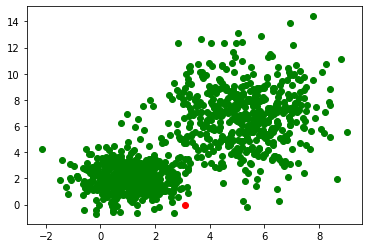

In [190]:
plt.plot(data[:, 0], data[:, 1], "go")
plt.plot(mu[0, 0], mu[0, 1], "ro")
# plt.plot(mu[1, 0], mu[1, 1], "ro")
plt.show()